<a href="https://colab.research.google.com/github/NiveskZ/ia-datascience-dataviz/blob/main/Aula_04/desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [1]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Vamos atuar como analista de dados de um e-commerce. Recebemos três bases de dados com os dados dos clientes e vendas em 2023 e quais clientes estão pré-cadastrados na Zoop Pay, respectivamente.

Vamos iniciar unindo as duas primeiras bases do nosso projeto ("vendas" e "clientes") em um DataFrame chamado "df" utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.


In [2]:
import pandas as pd

vendas = pd.read_csv(url_vendas)
clientes = pd.read_csv(url_clientes)

# Realizando a junção com base na coluna "ID_compra"
df = pd.merge(vendas, clientes, on='ID_compra', how='inner')

# Reorganizando as colunas conforme a ordem especificada
colunas_ordenadas = [
    "ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade",
    "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico",
    "cidade", "uf", "regiao", "cashback", "avaliacao_compra"
]

df = df[colunas_ordenadas]

# Exibindo as primeiras linhas para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Agora, vamos unir o "df" com a base "zoop_pay", lida a partir da url "url_zoop_pay", gerando um novo "df". Para união das bases, utilizaremos a coluna "ID_cliente". Além disso, vamos ajustar a coluna "data" para o formato datetime, em que seu formato na base de dados está como "YYYY-MM-DD".

In [3]:
import pandas as pd

# Leitura da base zoop_pay a partir da URL
zoop_pay = pd.read_csv(url_zoop_pay)

# Junção do df com a base zoop_pay utilizando "ID_cliente" como chave
df = pd.merge(df, zoop_pay, on="ID_cliente", how="left")  # 'left' para manter todas as compras mesmo que não estejam na Zoop Pay

# Convertendo a coluna 'data' para datetime no formato 'YYYY-MM-DD'
df['data'] = pd.to_datetime(df['data'], format="%Y-%m-%d")

# Exibindo as primeiras linhas para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,zoop_pay
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,Não
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,Sim
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,Não
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,Sim
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9,Não


## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!



Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de colunas que apresente o faturamento por região da Zoop.

Em "df", temos as colunas:

      regiao: regiao do(a) cliente
      preco_unitario: preço de uma unidade do produto
      quantidade: quantidade vendida do produto
      frete: frete a ser pago no total da compra.

Desejamos criar uma visualização que apresente o faturamento de cada região, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.


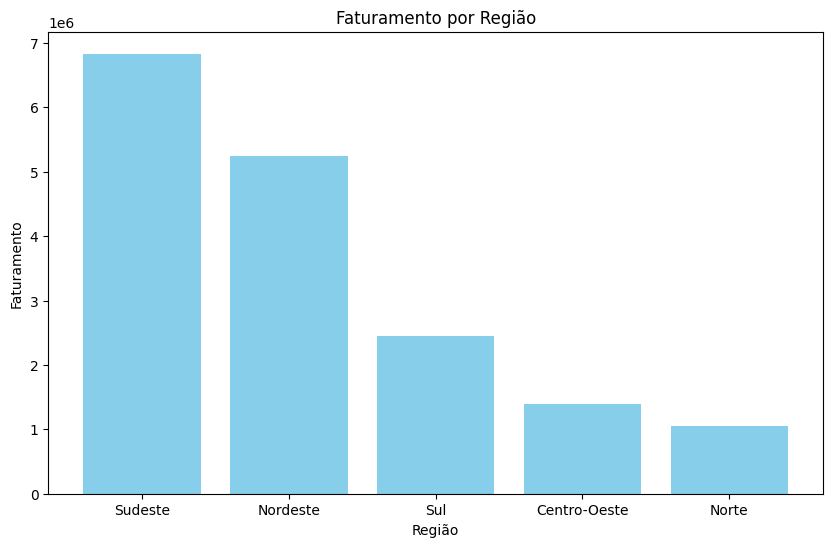

In [4]:
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!


  Temos um DataFrame chamado "df" e queremos construir um visual de colunas empilhadas que apresente a quantidade de pessoas por sexo biológico em relação aos estados de "São Paulo" e "Rio de Janeiro".

  Em "df", temos as colunas:

        uf: unidade federativa (estado) do(a) cliente. Vamos utilizar apenas os estados de "São Paulo" e "Rio de Janeiro"
        sexo_biologico: sexo biológico do(a) cliente

   Desejamos criar uma visualização que apresente a quantidade de pessoas agrupadas por sexo biológico nos estados que definimos.

  Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.


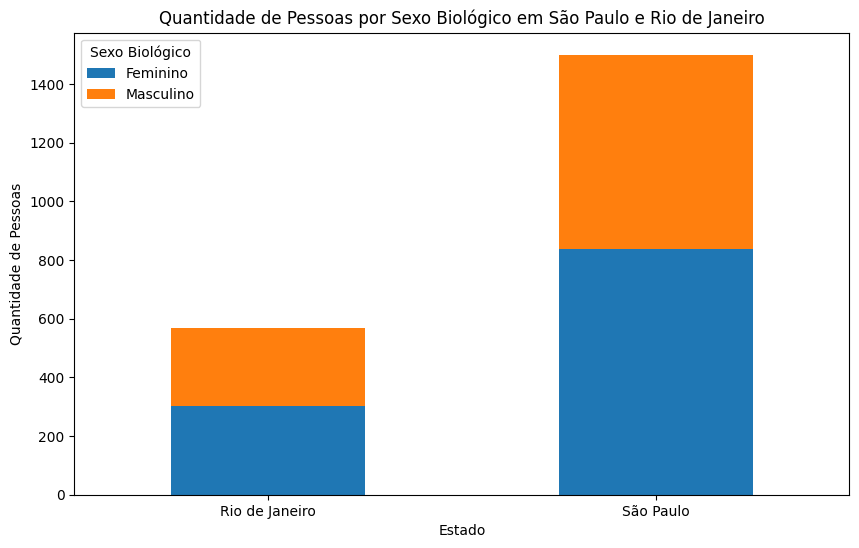

In [5]:
# Filtrar o DataFrame para incluir apenas os estados de "São Paulo" e "Rio de Janeiro"
df_filtrado = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contar a quantidade de pessoas por sexo biológico e estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

# Criar o gráfico de colunas empilhadas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Pessoas por Sexo Biológico em São Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)  # Mantém os rótulos dos estados na horizontal para melhor legibilidade

# Mostrar a legenda e o gráfico
plt.legend(title='Sexo Biológico')
plt.show()

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!



  Temos um DataFrame chamado "df" e queremos construir um visual que apresente a proporção dos(as) usuários(as) que realizaram o pré-cadastro na Zoop Pay, nova solução da Zoop.

  Em "df", temos a coluna "zoop_pay" que dispõe de tais dados. Construa um gráfico de rosca em que o valor "Sim" receba a cor #2a9d8f e "Não" a cor #edede9.

  Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.


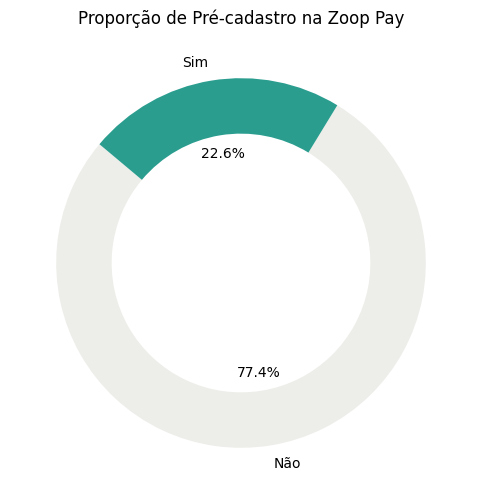

In [6]:
# Contabiliza a quantidade de usuários que realizaram o pré-cadastro na Zoop Pay
pre_cadastro_counts = df['zoop_pay'].value_counts()

# Define as cores para cada valor
colors = ['#2a9d8f' if label == 'Sim' else '#edede9' for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(8, 6))
plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Adiciona um título ao gráfico
plt.title('Proporção de Pré-cadastro na Zoop Pay')

# Exibe o gráfico
plt.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!



   Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribuição das idades dos(as) clientes por região.

  Em "df", temos as colunas:

        regiao: região da pessoa que realizou a compra.
        idade: idade da pessoa que realizou a compra

  Desejamos criar uma visualização de boxplot que apresente a distribuição desses dados. Coloque as idades no eixo x e as regiões no eixo y

  Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.


/tmp/ipython-input-7-3044150673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind")  # Cria o boxplot


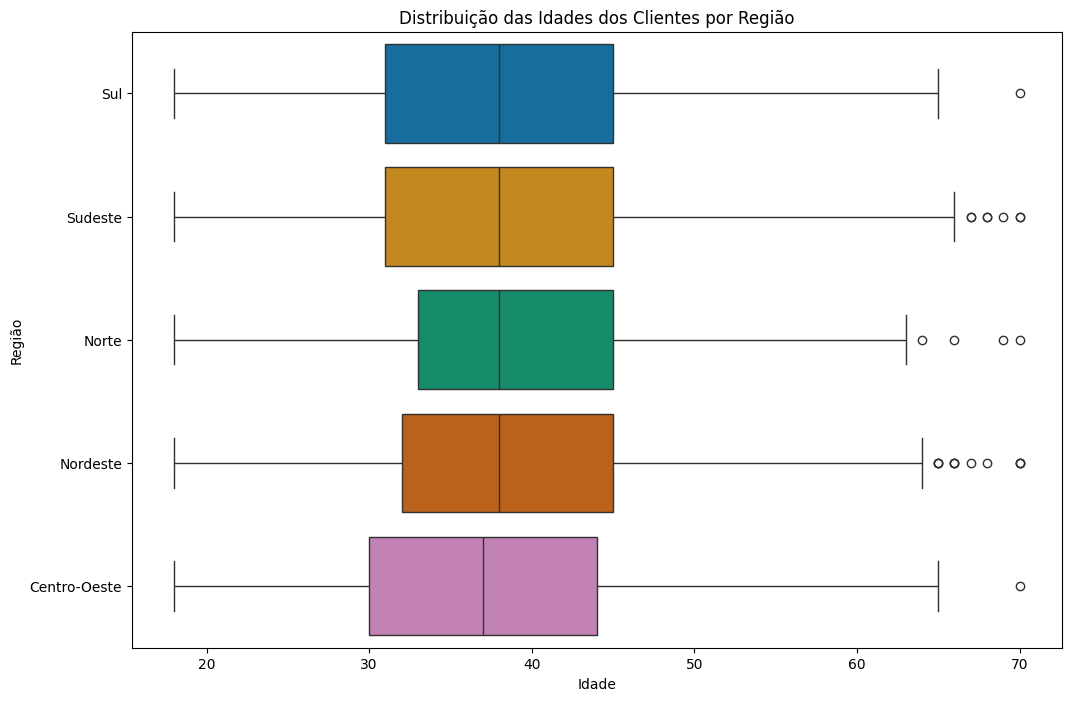

In [7]:
import seaborn as sns

# Criação do boxplot
plt.figure(figsize=(12, 8))  # Define o tamanho do gráfico
boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind")  # Cria o boxplot

# Adiciona títulos e rótulos aos eixos
plt.title('Distribuição das Idades dos Clientes por Região')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Região')  # Rótulo do eixo Y

# Exibe o gráfico
plt.show()


## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [8]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

##### Gráfico sem refinamento

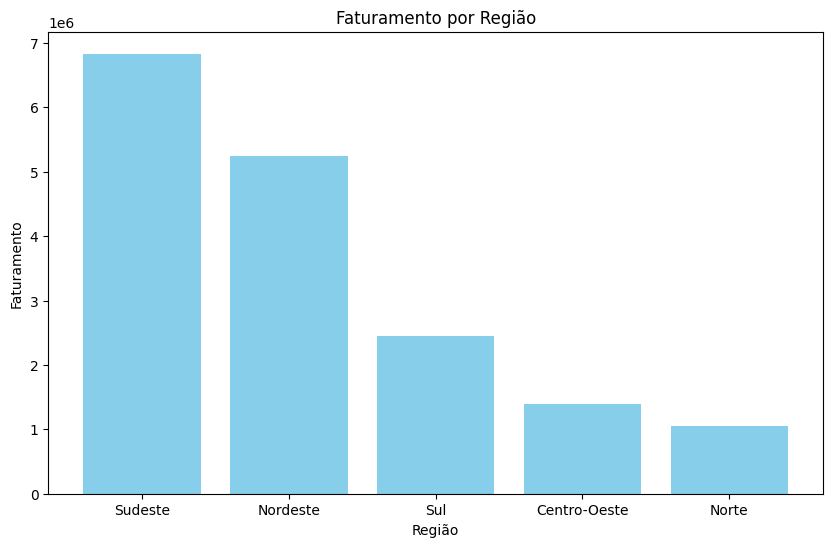

In [9]:
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico



> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Vamos refinar o gráfico que fizemos de faturamento por região? Ele precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor AQUA_1 e o tamanho da figura deve ser de (10, 6).

O título da figura é "Faturamento por Região em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo y (yticks) devem ser excluídos, assim como os label do eixo x e y (xlabel e ylabel), os rótulos do eixo X (xticks) devem ter tamanho 12 com a cor AZUL_1. Retire todas as bordas do gráfico. Exiba o total de cada faturamento acima de cada coluna no formato "R$ valor M" com o valor dividido por 1 milhão (1e6) e com 1 casa decimal e com o texto na cor AZUL_1 e tamanho 12.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

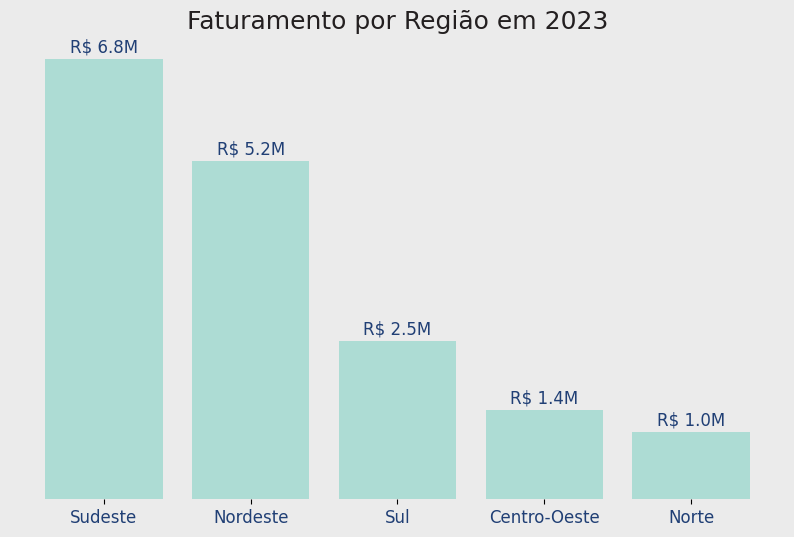

In [10]:
# Configurações gerais da figura
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
plt.gca().set_facecolor(CINZA_1) # Configuração do fundo do plot

# Criação do gráfico de colunas
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento']/1e6, color=AQUA_1)
plt.title('Faturamento por Região em 2023', color=CINZA_5, fontsize=18)
plt.yticks([])  # Remoção dos rótulos do eixo y
plt.ylabel('')  # Remoção do label do eixo y
plt.xticks(fontsize=12, color=AZUL_1)
plt.box(False)  # Remoção das bordas do gráfico

# Adiciona o total do faturamento acima de cada coluna
for index, value in enumerate(faturamento_por_regiao['faturamento']):
    plt.text(index, value/1e6 + 0.1, f'R$ {value/1e6:.1f}M', color=AZUL_1, ha='center', fontsize=12)

# Exibe o gráfico
plt.show()

#### Desafio 2:

##### Gráfico sem refinamento


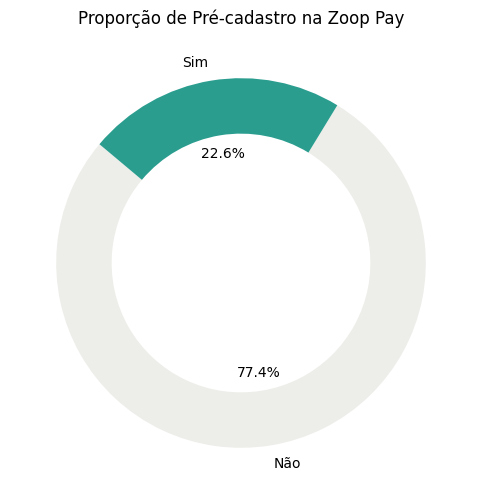

In [11]:
# Contabiliza a quantidade de usuários que realizaram o pré-cadastro na Zoop Pay
pre_cadastro_counts = df['zoop_pay'].value_counts()

# Define as cores para cada valor
colors = ['#2a9d8f' if label == 'Sim' else '#edede9' for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(8, 6))
plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Adiciona um título ao gráfico
plt.title('Proporção de Pré-cadastro na Zoop Pay')

# Exibe o gráfico
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Agora, vamos refinar o gráfico de rosca que produzimos para a proporção dos usuários que realizaram o pré-cadastro na Zoop Pay.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor da fatia de valor "Não" igual a CINZA_3, a cor da fatia de valor "Sim" igual a AZUL_3 e o tamanho da figura deve ser de (6, 6).

O título da figura é "Pré-cadastrado(a) na Zoop Pay?" com tamanho 18 e sua cor CINZA_5.

Os rótulos das fatias precisam ter a mesma cor das fatias e tamanho 12 e as porcentagens precisam estar na cor BRANCO, em negrito, e com tamanho 12.

A propriedade da largura da rosca (wedgeprops) precisa ser de 0.4, a posição das porcentagens dentro da fatia (pctdistance) precisa ser de 0.8, o ângulo de início de 180 (startangle) e sem explosão de fatias.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

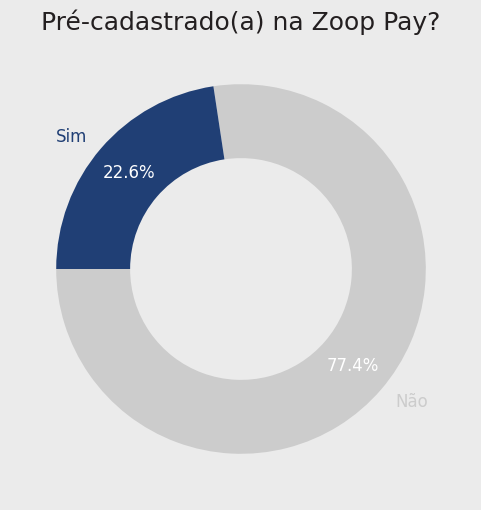

In [12]:
# Define as cores para cada valor
colors = [AZUL_1 if label == 'Sim' else CINZA_3 for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(6, 6), facecolor=CINZA_1)
plt.gca().set_facecolor(CINZA_1)    # Altera a cor do fundo do plot
patches, texts, autotexts = plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=180,
                                    colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)

# Adiciona o título com a cor e tamanho especificados
plt.title('Pré-cadastrado(a) na Zoop Pay?', color=CINZA_5, fontsize=18)

# Configura as cores e tamanhos dos rótulos das fatias e porcentagens
for text, autotext, color in zip(texts, autotexts, [CINZA_3, AZUL_1]):
    text.set_color(color) # Define a cor do rótulo da fatia igual à cor da fatia
    text.set_fontsize(12)
    autotext.set_color(BRANCO)  # Define a cor das porcentagens como branco
    autotext.set_fontsize(12)

# Exibe o gráfico
plt.show()